<a href="https://colab.research.google.com/github/aneeshghisad/BTech-Project/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/milknew.csv'
df = pd.read_csv(path)

df = df.drop(['Fat ','Taste'], axis=1)
df.head()

,pH,Temprature,Odor,Turbidity,Colour,Grade
0,6.6,35,0,0,254,high
1,6.6,36,1,1,253,high
2,8.5,70,1,1,246,low
3,9.5,34,1,1,255,low
4,6.6,37,0,0,255,medium


['high' 'low' 'medium']
[0 0 1 1 2 0 1 1 1 2]
Accuracy: 0.9716981132075472

Classification Report:
               precision    recall  f1-score   support

        high       0.95      0.93      0.94        76
         low       1.00      0.98      0.99       115
      medium       0.96      0.98      0.97       127

    accuracy                           0.97       318
   macro avg       0.97      0.97      0.97       318
weighted avg       0.97      0.97      0.97       318



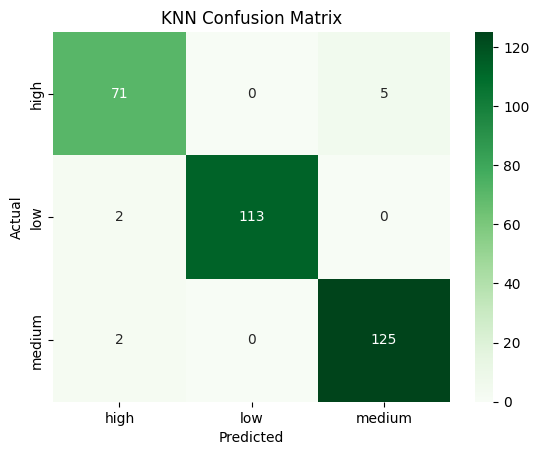

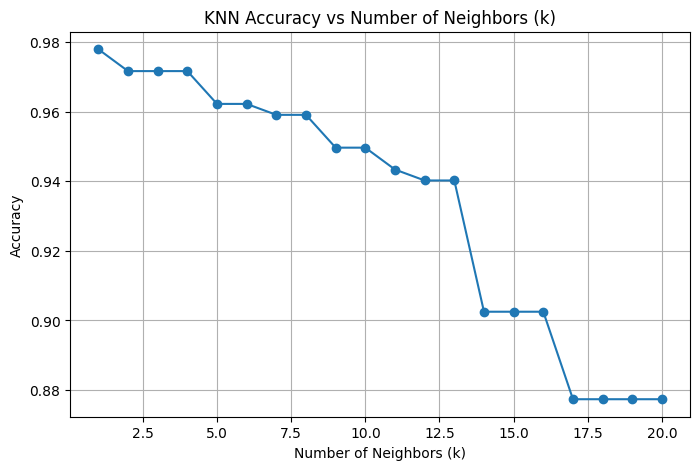

In [6]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = df.drop('Grade', axis=1)
y = df['Grade']

le = LabelEncoder()
y = le.fit_transform(y)

print(le.classes_)
print(y[:10])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


accuracy = []
neighbors = range(1, 21)

for k in neighbors:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn_temp.predict(X_test))
    accuracy.append(acc)

plt.figure(figsize=(8,5))
plt.plot(neighbors, accuracy, marker='o')
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [5]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 11)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print("Best k based on cross-validation:", best_k)
print("Cross-validated accuracy:", max(cv_scores))


Best k based on cross-validation: 3
Cross-validated accuracy: 0.9829965125637127
